### 프로필 이미지 감정분류
> Label : 'neutral', 'anger', 'sad', 'happy'

<br>


> **데이터 셋**

**affectnet from Kaggle :**
[download_link](https://www.kaggle.com/datasets/noamsegal/affectnet-training-data)
<br>

![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/5153d85c-6d8c-45fb-8479-5ce76f67a8eb)

<br>

> **클래스분포**

     anger와 sad 감정에 대한 클래스불균형존재
> ![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/c648d1c3-6805-4ca0-8b80-0a678bb49183)

> **오버샘플링진행**


> ![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/cc4466a2-a491-4202-b606-028d4a677e3a)


> **데이터증강**


            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            #zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4

<br>


> **데이터분할 및 교차검증**

> train : test = 8 : 2

> train : valid = 8 : 2 ( s-kfold 4)

<br>
<br>

> **전처리**

> 정규화과정 적용

<br>


### Model

> **기준모델**

다경이가 올려준 코드를 돌려서 전체 감정에 대해 분류했을때는 나쁘지 않은 결과가 나왔지만, 4가지 감정의 데이터를 활용해서 돌렸을때 성능이 좋지 않아서 ResNet으로 진행하였습니다.

ResNet50 사전학습 모델 (weights from imageNet)

![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/a0695f20-22c7-4b07-9d3d-c104658e4c44)

FNN :

    x = GlobalAveragePooling2D()(bm_output)
    x = Dense(128, activation='relu', name='fc1')(x)
    output = Dense(n_classes, activation='softmax', name='output')(x)




> **손실함수 및 최적화**

<table border="1" width ="500" height="100" align = "center">
	<th> 손실함수 </th>
  <th> 최적화 </th>
	<th> 평가지표 </th>

  <tr align = "center"><!-- 첫번째 줄 시작 -->
	    <td> categorical-crossentropy </td>
	    <td> Adam  </td>
      <td> Accuracy, F1 </td>

  </tr>
</table>

<br>

> **하이퍼파라미터 설정**

<table border="1" width ="500" height="100" align = "center">
	<th> Batch </th>
  <th> Epochs </th>
	<th> LearningRate </th>
  <th> KFold-nsplits </th>
  <tr align = "center"><!-- 첫번째 줄 시작 -->
	    <td> 15 </td>
	    <td> 10  </td>
      <td> 0.00001 </td>
      <td> 	4  </td>
  </tr>
</table>

<br>


> **성능**

 **아래 테이블의 평가성능은 4fold에 대한 soft-voting(avg)값으로 평가한 성능입니다.**

<br>

<table border="1" width ="300" height="100" align = "center">
	<th> 정확도 </th>
  <th> mF1스코어 </th>

  
  <tr align = "center"><!-- 첫번째 줄 시작 -->
	    <td> 0.758 </td>
	    <td> 0.744  </td>
     
  </tr>
</table>

<br>

![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/0dd7f0be-0ab5-4a5e-96a3-e725b9ea0a26)

> loss & acc (train, valid)

![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/314ce9c0-a72f-4ead-b057-bb97a0c0ac29)


<br>



### Sample Test


![image](https://github.com/Jongwon0280/Recommendation-Webtoon-Web/assets/56438131/b979af0c-f373-47c9-bca4-4b743dc7c9bd)


<br>

> **추가적으로 해볼만한것**

다른 모델을 시도해보거나, 미세튜닝

데이터증강에 다른 증강기법 사용

데이터 추가하기

일단 sad와 angry분류를 힘들어하는것 같습니다.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> **AFFECTNET FROM KAGGLE**

In [ ]:
mkdir affectnet

In [ ]:
cd affectnet

/content/affectnet


In [ ]:
!unzip -qq "/content/drive/MyDrive/dataset/facial_dataset/archive (3).zip"

In [ ]:
ls

anger/     disgust/  happy/      neutral/  surprise/
contempt/  fear/     labels.csv  sad/


> **AIHUB FACE DATASET**

In [ ]:
ls

drive/  sample_data/


In [ ]:
unzip -qq '/content/drive/MyDrive/our_prj/AIHUB/face0831.zip'

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from os.path import join

In [ ]:
# 1. define functions to pre-process and load images into arrays / label from folders
import os
INPUT_PATH = "/content/content/face"
USE_EMO = ['neutral','angry','sad','happy']
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir() and f.name in USE_EMO]
IMAGE_SIZE = (128,128)
print(EMOTIONS)

['sad', 'angry', 'neutral', 'happy']


### 클래스불균형 존재

In [ ]:
#파일크기 확인
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)


countFile(os.path.join(INPUT_PATH,"happy"))
countFile(os.path.join(INPUT_PATH,"sad"))
countFile(os.path.join(INPUT_PATH,"angry"))
countFile(os.path.join(INPUT_PATH,"neutral"))

Number of files in directory /content/content/face/happy is  12111
Number of files in directory /content/content/face/sad is  11794
Number of files in directory /content/content/face/angry is  12336
Number of files in directory /content/content/face/neutral is  11899


Text(0.5, 1.0, 'class count')

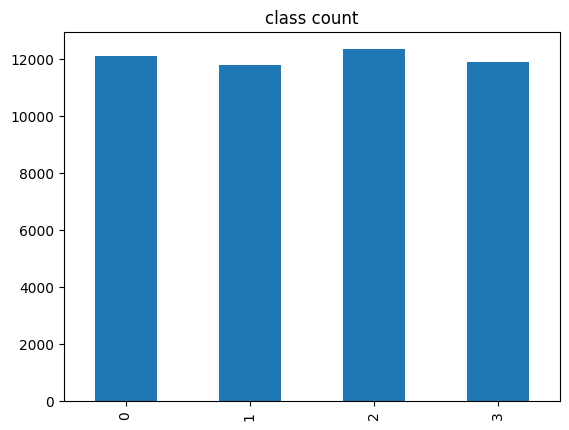

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.Series(file_counts).plot(kind='bar')
plt.title('class count')

이정도면 그냥 개수를 맞게 자르고 <br>
수행하면 될 것 같아요

In [ ]:
import numpy as np

In [ ]:
from keras.utils import to_categorical
import os

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            #print(filename)
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            if img is None :
              print("none")
              break
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #컬러
            img = cv2.resize(img, image_size)
            #img = img.astype('float32') / 255.0  # Normilize
            yield img , index


def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    #plt.xcorr = np.array(X)
    X=np.array(X)
    y = to_categorical(np.array(y), num_classes=4)
    return X, y

In [ ]:
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
# print(X.shape)
# (48140, 128, 128, 3)

In [ ]:
np.random.seed(0)

# 섞을 인덱스를 생성합니다.
shuffle_indices = np.arange(X.shape[0])
np.random.shuffle(shuffle_indices)

# 인덱스를 기반으로 배열을 섞습니다.
X = X[shuffle_indices]
y = y[shuffle_indices]

[12221 40439 19469 36282 32061 27026]


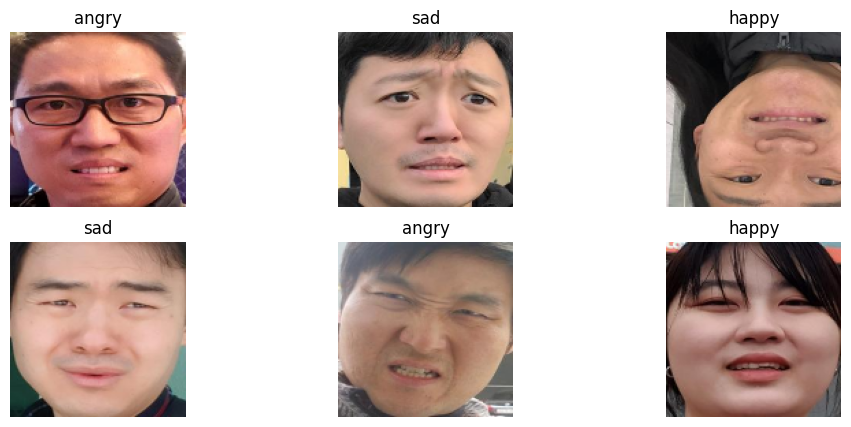

In [ ]:
#랜덤 이미지 출력
row=2
col=3

fig,axes = plt.subplots(figsize=(12,5),nrows=row,ncols=col)

pid=np.random.choice(range(X.shape[0]),row*col,replace =False)
print(pid)

for idx in range(row*col):
  r = idx // col
  c = idx % col

  axes[r,c].imshow(X[pid[idx]])
  axes[r,c].set_title(f'{EMOTIONS[np.argmax(y[pid[idx]])]}')
  axes[r,c].axis('off')


> **ImageDataGenerator**

> valid셋에 대해서는 아무런 조치를 취하지 않았고, train에 대해서 적용하였습니다.

In [ ]:
import tensorflow as tf

> 다음과 같은 옵션으로 데이터증강을 시켰을때 valid성능이 train성능보다 높게 측정되는 현상이 발생하는데, 이는 데이터증강기법에 문제가 있을 수 도 있습니다.

> (+ 09.01) 전체이미지에 대한 정규화진행시 메모리 문제를 일으켜 배치단위로, 증강하는과정에서 정규화를 시도합니다.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tr_generator = ImageDataGenerator(
            rescale=1./255,
            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            #zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4
)

va_generator = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
def initialize_model(model):
    cloned_model = tf.keras.models.clone_model(model)
    cloned_model.set_weights(model.get_weights())
    return cloned_model

In [ ]:
import keras.backend as K

def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

> **s-kfold 모델 학습**

> 기본 stratified 4 fold로 학습을 진행하며, 조정할 수 있는 옵션들은 description 형태로 남겨놓았습니다.

> (+ 09.01 ) 각 fold당 학습한 후 predict하는 과정에서 정규화를 거치지 않은채 결과를 출력하여, 이를 보완하기 위해 line 62에 정규화를 거쳐 예측하도록 수정하였습니다.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import gc

def kfold_fit(X_train,Y_train,n_splits,random_state=5,
              model=None,BATCH_SIZE=20,EPOCHS=10,aug=False,
             rlr_cb=None,ely_cb=None,tr_generator=None,va_generator=None):

    '''
    n_splits 인자에 따른 stratified k-fold 교차검증을 실시합니다.
    X_train = x , Y_train = y , random_state는 StratifiedKFold의 인자이며 동일한
    valid set을 분리하는데 사용하는 seed값입니다. BATCH_SIZE와 EPOCHS는 각각 30, 100의 기본값을
    주었으며, aug옵션은 데이터를 증강할 것인지 여부입니다.
    이 함수는 return으로 k교차 검증한 모델들을 append한 리스트를 반환합니다.
    ex) n-splits : 10 -> return : (10 model's history list , AVG of M-F1score)

    '''
    base_model = initialize_model(model)


    n_folds=n_splits
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

    models=[] # 모델저장
    historys=[]

    m_f1 =0.0
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train,Y_train.argmax(1))): # Y_train (one-hot vector -> label)
            # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter+1,' 시작')
        X_tr = X_train[train_index]
        y_tr = Y_train[train_index]
        X_te = X_train[valid_index]
        y_te = Y_train[valid_index]

        model = initialize_model(base_model)
        model.compile(
              optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
                metrics=['accuracy',get_f1]
             )

        if aug :
            flow_tr_gen = tr_generator.flow(X_tr, y_tr, batch_size=BATCH_SIZE, shuffle=True)
            flow_val_gen = va_generator.flow(X_te, y_te, batch_size=BATCH_SIZE, shuffle=False)

            history=model.fit(flow_tr_gen,validation_data=(flow_val_gen),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=[rlr_cb,ely_cb]
                     )
        else :
            history=model.fit(X_tr,y_tr,validation_data=(X_te,y_te),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  callbacks=[rlr_cb,ely_cb]
                 )
        historys.append(history)
        models.append(model)
        #model.save(f'model_{folder_counter+1}.h5')

    # 메모리에서 모델 삭제


        pred=model.predict(X_te/255.0)
        y_pred=np.argmax(pred,axis=1)
        y_label=np.argmax(y_te,axis=1)

        print("macro-f1 score : ",f1_score(y_label,y_pred,average='macro'))
        del model
        gc.collect()  # 가비지 컬렉터 호출
        m_f1+=f1_score(y_label,y_pred,average='macro')





    m_f1 = m_f1 / n_folds
    #return m_f1
    return (historys,models,m_f1)



그냥 11500개로 다 맞추고 수행<br>
스케일링만 했어요

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋 로드 및 전처리
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)

# 클래스별 이미지 수
class_counts = [12111, 11794, 12336, 11899]

# 클래스당 사용할 이미지 수 (11,500개)
sample_per_class = 11500

# 클래스별 이미지 인덱스를 저장할 리스트 초기화
indices_per_class = [[] for _ in range(len(class_counts))]

# 클래스별 이미지 인덱스 구하기
for class_idx in range(len(class_counts)):
    class_indices = np.where(np.argmax(y, axis=1) == class_idx)[0]
    # 클래스당 이미지 수가 11,500개보다 작으면 모두 선택
    if len(class_indices) <= sample_per_class:
        indices_per_class[class_idx] = class_indices
    else:
        # 클래스당 11,500개의 이미지를 무작위로 선택
        selected_indices = np.random.choice(class_indices, sample_per_class, replace=False)
        indices_per_class[class_idx] = selected_indices

# 클래스별 이미지 인덱스를 하나로 합치기
selected_indices = np.concatenate(indices_per_class)

# 데이터를 선택된 인덱스로 필터링
X_selected = X[selected_indices]
y_selected = y[selected_indices]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=125)


In [ ]:
# test데이터에 대해서는 stratifiy를 적용하지 않고 실시한다.

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=125) #stratify=y,random_state=125)

> train의 클래스불균형해소

> (-09.01) 메모리 문제로 오버샘플링을 진행하지 않았습니다.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
X_train = X_train.reshape(X_train.shape[0], -1)
X_train,y_train  = oversample.fit_resample(X_train,y_train)
# 샘플 수를 계산
n_samples, n_features = X_train.shape

# 이미지 크기를 (128, 128, 3)으로 가정하고 샘플 수를 계산
new_shape = (n_samples, 128, 128, 3)
# 데이터 크기를 변경
X_train = X_train.reshape(new_shape)

indices = np.arange(len(X_train))

# 인덱스를 랜덤하게 섞음
np.random.shuffle(indices)

# 섞인 인덱스를 사용하여 X_train과 Y_train 재정렬
X_train = X_train[indices]
y_train = y_train[indices]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# # 기존
# (38512, 128, 128, 3)
# (9628, 128, 128, 3)
# (38512, 4)
# (9628, 4)
# mino
# (36800, 128, 128, 3)
# (9200, 128, 128, 3)
# (36800, 4)
# (9200, 4)

(36800, 128, 128, 3)
(9200, 128, 128, 3)
(36800, 4)
(9200, 4)


Text(0.5, 1.0, 'mino_11500.ver')

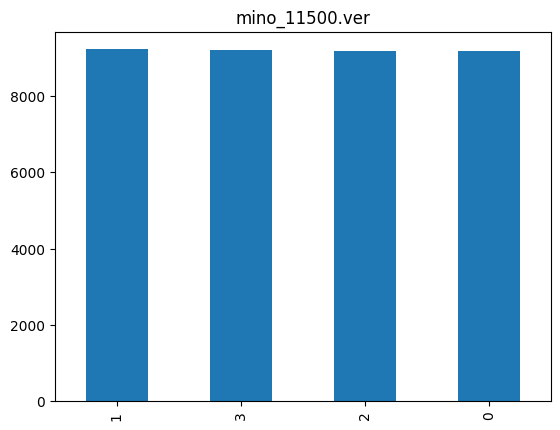

In [ ]:
pd.Series(np.argmax(y_train,axis=1)).value_counts().plot(kind='bar')
plt.title('mino_11500.ver')

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D , MaxPooling2D , BatchNormalization, Activation, Flatten ,  GlobalAveragePooling2D, Dense ,  Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping



IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]

def model_resnet(in_shape=(IMG_HEIGHT, IMG_WIDTH, 3), n_classes=4):
    input_tensor = Input(shape=in_shape)

    base_model = ResNet50(input_tensor=input_tensor, include_top=False, weights='imagenet')
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    x = Dense(128, activation='relu', name='fc1')(x)
    output = Dense(n_classes, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

In [ ]:
model = model_resnet(in_shape=(IMG_HEIGHT, IMG_WIDTH, 3), n_classes=4)

model.compile(
              optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
                metrics=['accuracy',get_f1]
             )

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

> **모델 아키텍처**

In [ ]:
from IPython.display import Image
tf.keras.utils.plot_model(model, to_file='resnet50_model.png', show_shapes=True)
Image("resnet50_model.png")

Output hidden; open in https://colab.research.google.com to view.

>
### train / valid

### loss, acc , f1

> **Test Prediction and Evaluation**

> 전체 데이터의 20%를 사용하여 예측에 활용하였습니다.

<br>

> **Affect Kaggle**

> 이미지 사이즈 : (96, 96, 3)
<br>

<table border="1" width ="300" height="100" align = "center">
	<th> 정확도 </th>
  <th> mF1스코어 </th>

  
  <tr align = "center"><!-- 첫번째 줄 시작 -->
	    <td> 0.758 </td>
	    <td> 0.744  </td>
     
  </tr>
</table>

<br>

> **AIHUB**

> 이미지 사이즈 : (150, 150, 3)

<table border="1" width ="300" height="100" align = "center">
	<th> 정확도 </th>
  <th> mF1스코어 </th>

  
  <tr align = "center"><!-- 첫번째 줄 시작 -->
	    <td> 0. </td>
	    <td> 0.  </td>
     
  </tr>
</table>

<br>

mino_ver

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from os.path import join
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import gc
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
unzip -qq '/content/drive/MyDrive/our_prj/AIHUB/face0831.zip'

SyntaxError: ignored

In [ ]:
# 상수 및 경로 정의
INPUT_PATH = "/content/content/face"
USE_EMO = ['neutral', 'angry', 'sad', 'happy']
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir() and f.name in USE_EMO]
IMAGE_SIZE = (128, 128)
print(EMOTIONS)

['sad', 'angry', 'neutral', 'happy']


In [ ]:
import os
from keras.utils import to_categorical

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            if img is None:
                print("none")
                break
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, image_size)
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = to_categorical(np.array(y), num_classes=4)
    return X, y

In [ ]:
# 데이터셋 로드 및 전처리
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)

# 클래스별 이미지 수
class_counts = [12111, 11794, 12336, 11899]
sample_per_class = 11500

# 클래스별 이미지 인덱스를 저장할 리스트 초기화
indices_per_class = [[] for _ in range(len(class_counts))]

# 클래스별 이미지 인덱스 구하기
for class_idx in range(len(class_counts)):
    class_indices = np.where(np.argmax(y, axis=1) == class_idx)[0]
    # 클래스당 이미지 수가 11,500개보다 작으면 모두 선택
    if len(class_indices) <= sample_per_class:
        indices_per_class[class_idx] = class_indices
    else:
        # 클래스당 11,500개의 이미지를 무작위로 선택
        selected_indices = np.random.choice(class_indices, sample_per_class, replace=False)
        indices_per_class[class_idx] = selected_indices

# 클래스별 이미지 인덱스를 하나로 합치기
selected_indices = np.concatenate(indices_per_class)

# 데이터를 선택된 인덱스로 필터링
X_selected = X[selected_indices]
y_selected = y[selected_indices]
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=125)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(36800, 128, 128, 3)
(9200, 128, 128, 3)


In [ ]:
import keras.backend as K

def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import gc
def initialize_model(model):
    cloned_model = tf.keras.models.clone_model(model)
    cloned_model.set_weights(model.get_weights())
    return cloned_model

In [ ]:

def kfold_fit(X_train,Y_train,n_splits,random_state=5,
              model=None,BATCH_SIZE=20,EPOCHS=10,aug=False,
             rlr_cb=None,ely_cb=None,tr_generator=None,va_generator=None):

    '''
    n_splits 인자에 따른 stratified k-fold 교차검증을 실시합니다.
    X_train = x , Y_train = y , random_state는 StratifiedKFold의 인자이며 동일한
    valid set을 분리하는데 사용하는 seed값입니다. BATCH_SIZE와 EPOCHS는 각각 30, 100의 기본값을
    주었으며, aug옵션은 데이터를 증강할 것인지 여부입니다.
    이 함수는 return으로 k교차 검증한 모델들을 append한 리스트를 반환합니다.
    ex) n-splits : 10 -> return : (10 model's history list , AVG of M-F1score)

    '''
    base_model = initialize_model(model)


    n_folds=n_splits
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True)

    models=[] # 모델저장
    historys=[]

    m_f1 =0.0
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train,Y_train.argmax(1))): # Y_train (one-hot vector -> label)
            # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter+1,' 시작')
        X_tr = X_train[train_index]
        y_tr = Y_train[train_index]
        X_te = X_train[valid_index]
        y_te = Y_train[valid_index]

        model = initialize_model(base_model)
        model.compile(
              optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
                metrics=['accuracy',get_f1]
             )

        if aug :
            flow_tr_gen = tr_generator.flow(X_tr, y_tr, batch_size=BATCH_SIZE, shuffle=True)
            flow_val_gen = va_generator.flow(X_te, y_te, batch_size=BATCH_SIZE, shuffle=False)

            history=model.fit(flow_tr_gen,validation_data=(flow_val_gen),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=[rlr_cb,ely_cb]
                     )
        else :
            history=model.fit(X_tr,y_tr,validation_data=(X_te,y_te),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  callbacks=[rlr_cb,ely_cb]
                 )
        historys.append(history)
        models.append(model)
        #model.save(f'model_{folder_counter+1}.h5')

    # 메모리에서 모델 삭제


        pred=model.predict(X_te/255.0)
        y_pred=np.argmax(pred,axis=1)
        y_label=np.argmax(y_te,axis=1)

        print("macro-f1 score : ",f1_score(y_label,y_pred,average='macro'))
        del model
        gc.collect()  # 가비지 컬렉터 호출
        m_f1+=f1_score(y_label,y_pred,average='macro')





    m_f1 = m_f1 / n_folds
    #return m_f1
    return (historys,models,m_f1)

In [ ]:
# ResNet50 기반 모델 정의
IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]

def model_resnet(in_shape=(IMG_HEIGHT, IMG_WIDTH, 3), n_classes=4):
    # ResNet50 기반 모델 정의
    input_tensor = Input(shape=in_shape)

    base_model = ResNet50(input_tensor=input_tensor, include_top=False, weights='imagenet')
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    x = Dense(128, activation='relu', name='fc1')(x)
    output = Dense(n_classes, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    model.summary()

    return model

# 모델 컴파일
model = model_resnet(in_shape=(IMG_HEIGHT, IMG_WIDTH, 3), n_classes=4)
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy', get_f1]
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [ ]:
# 콜백 함수 정의
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

In [ ]:
# 데이터 증강 생성기
tr_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.3,
    width_shift_range=0.25,
    height_shift_range=0.25,
    channel_shift_range=0.35,
    shear_range=0.2,
    zoom_range=0.4
)
va_generator = ImageDataGenerator(
    rescale=1./255,
)
# 모델 초기화 및 훈련
BATCH_SIZE = 5
EPOCHS = 5
res50_AUG = kfold_fit(X_train, y_train, n_splits=4, aug=True,
                      tr_generator=tr_generator, EPOCHS=EPOCHS, BATCH_SIZE=BATCH_SIZE,
                      random_state=125,
                      va_generator=va_generator,
                      model=model, rlr_cb=rlr_cb, ely_cb=ely_cb)

# 모델 저장
for idx, model in enumerate(res50_AUG[1]):
    model.save(f'model_{idx + 1}.h5')

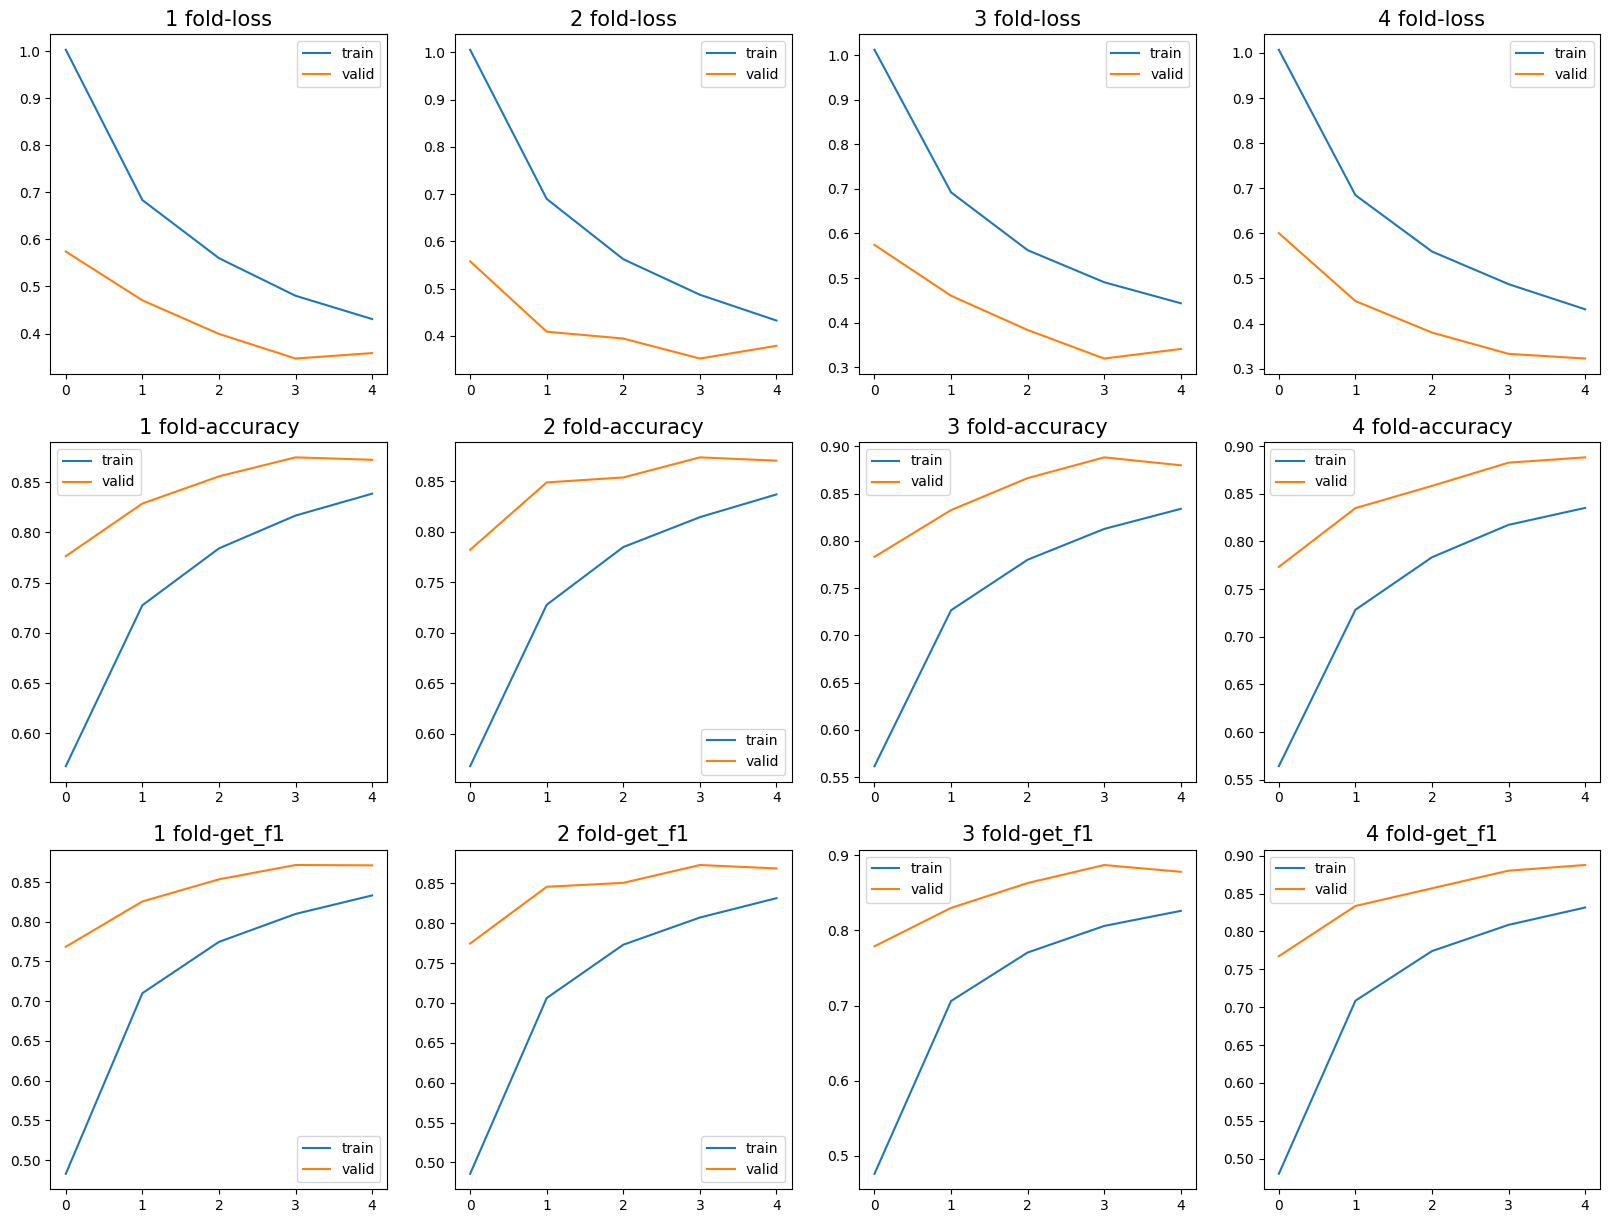

In [ ]:
# 훈련 이력 시각화
historys = res50_AUG[0]
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for index, history in zip(range(0, 3 + 1), historys):
    for i, name in zip(range(0, 2 + 1), ['loss', 'accuracy', 'get_f1']):
        axes[i][index].set_title(f'{index + 1} fold-{name}', fontsize=15)
        axes[i][index].plot(history.history[name], label='train')
        axes[i][index].plot(history.history['val_' + name], label='valid')
        axes[i][index].legend()

In [ ]:
from tensorflow.keras.models import load_model
X_test = X_test/255.0
pred=np.zeros((len(X_test),4), dtype=np.float32)
custom_objects = {'get_f1': get_f1}

for model in os.listdir('/content/model_'):
  path = os.path.join('/content/model_',model)
  f_model=load_model(path,custom_objects = custom_objects)
  pred+=f_model.predict(X_test)
# for i in range(len(res50_AUG[1])):
#     model_name = f'model_{i+1}.h5'
#     print(model_name)
#     model = load_model(model_name, custom_objects=custom_objects)
#     pred+=model.predict(X_test)

from sklearn.metrics import accuracy_score

y_true=np.argmax(y_test,axis=1)
y_predic =np.argmax(pred/4.,axis=1)

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# dic = {'acc' :accuracy_score(y_true,y_predic) , 'f1' : f1_score(y_true,y_predic,average='macro') }

# cm=confusion_matrix(y_true,y_predic)

# ConfusionMatrixDisplay(cm,display_labels=[]).plot()

# pd.DataFrame([dic])

288/288 [==============================] - 5s 14ms/step


        acc        f1
0  0.896413  0.895933


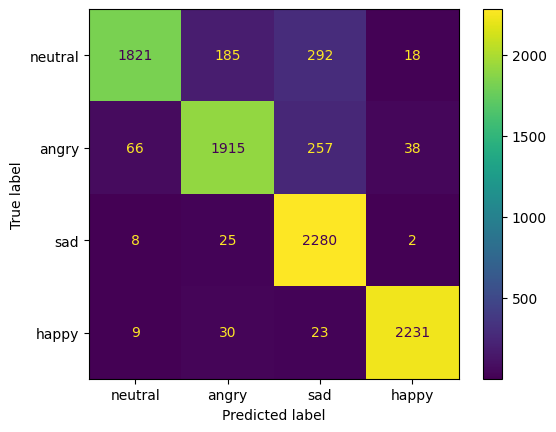

In [ ]:
# 혼동 행렬 생성
cm = confusion_matrix(y_true, y_predic)
dic = {'acc' :accuracy_score(y_true,y_predic) , 'f1' : f1_score(y_true,y_predic,average='macro') }
print(pd.DataFrame([dic]))
# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=USE_EMO)
disp.plot(cmap='viridis')
plt.show()


In [ ]:
import zipfile
import os

# 모델 파일들이 있는 디렉토리 경로
model_directory = '/content/model_'

# 압축할 파일 이름과 경로 설정
zip_filename = 'mymodel.zip'
zip_filepath = os.path.join(model_directory, zip_filename)
# 압축 대상 파일 목록 설정 (model_로 시작하는 파일)
files_to_zip = [f for f in os.listdir(model_directory) if f.startswith('model_')]

# 압축 작업 수행
with zipfile.ZipFile(zip_filepath, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in files_to_zip:
        file_path = os.path.join(model_directory, file)
        zipf.write(file_path, os.path.basename(file_path))

print(f'압축 파일 "{zip_filename}"이 생성되었습니다.')

압축 파일 "mymodel.zip"이 생성되었습니다.


### Sample Image Test

In [ ]:
from PIL import Image

In [ ]:
images = []
sample_len = 6

for idx in range(1, sample_len + 1):
    image = Image.open(os.path.join(f'/content/drive/MyDrive/dataset/facial_dataset/sam{idx+1}.jpg'))


    image_np = np.array(image) / 255.
    image_tensor = tf.convert_to_tensor(image_np)



    image_resized = tf.image.resize(image_tensor, (IMG_HEIGHT, IMG_WIDTH))


    images.append(image_resized)


images_array = np.stack(images, axis=0)



In [ ]:

pred=np.zeros((sample_len,4), dtype=np.float32)
for model in res50_AUG[1]:
  pred+=model.predict(images_array)

1/1 [==============================] - 0s 24ms/step


In [ ]:
pred

array([[7.6867735e-01, 1.9682294e+00, 1.2386643e+00, 2.4429042e-02],
       [1.2486041e-02, 1.7903740e+00, 9.1574705e-01, 1.2813929e+00],
       [1.0760165e-01, 1.2800312e+00, 2.6332492e-01, 2.3490422e+00],
       [4.0789250e-01, 6.3258648e-01, 2.9217496e+00, 3.7771225e-02],
       [3.1425400e+00, 4.3588360e-03, 6.1166803e-03, 8.4698451e-01],
       [1.9804696e-03, 8.0396432e-01, 2.5531876e-01, 2.9387364e+00]],
      dtype=float32)

In [ ]:

y_predic =np.argmax(pred/4.,axis=1)

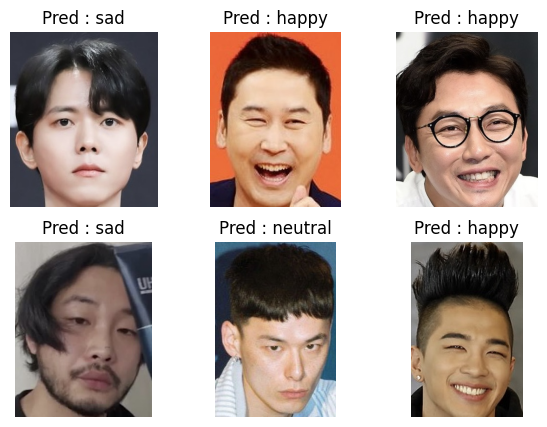

In [ ]:
fig, axes = plt.subplots(figsize=(7, 5), nrows=2, ncols=3)

for idx in range(sample_len):
    row = idx // 3
    col = idx % 3
    image = Image.open(os.path.join(f'/content/drive/MyDrive/dataset/facial_dataset/sam{idx+2}.jpg'))
    axes[row, col].imshow(image)
    axes[row, col].set_title(f'Pred : {USE_EMO[y_predic[idx].item()]}')
    axes[row, col].axis('off')

plt.show()


> ### model2_vgg_scratch

In [ ]:
model_2 = initialize_model(model_2)

vgg_hand=kfold_fit(X_train,y_train,n_splits=4,aug=True,
                    tr_generator=tr_generator,
                    random_state=125,
                    va_generator=va_generator,
                    model=model_2,rlr_cb=rlr_cb,ely_cb=ely_cb)


### -------------------------------------------------------------------------------------------------------------------

In [ ]:
# model

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

model_2 = Sequential()

model_2.add(Conv2D(32, (3,3), activation="selu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3,3), activation="selu"))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3,3), activation="selu"))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(256, activation='selu', kernel_regularizer=l2(0.01)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(4, activation='softmax'))

model_2.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 94, 94, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 47, 47, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 45, 45, 64)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

history = model_2.fit(X_train, y_train, batch_size=64,
                    epochs=25,
                    validation_data=(X_test, y_test),

                    callbacks = [EarlyStopping(patience=10, monitor='val_loss', mode='min'),
                                 ReduceLROnPlateau(patience=2, verbose=1),
                                 ModelCheckpoint('best_model.h5',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max')],
                    verbose=1)

Epoch 1/25
364/364 [==============================] - 15s 42ms/step - loss: 0.7509 - accuracy: 0.8104 - val_loss: 1.1323 - val_accuracy: 0.6743 - lr: 1.0000e-05
Epoch 2/25
364/364 [==============================] - 15s 41ms/step - loss: 0.7441 - accuracy: 0.8114 - val_loss: 1.1261 - val_accuracy: 0.6743 - lr: 1.0000e-05
Epoch 3/25
364/364 [==============================] - 15s 42ms/step - loss: 0.7241 - accuracy: 0.8174 - val_loss: 1.1222 - val_accuracy: 0.6748 - lr: 1.0000e-05
Epoch 4/25
364/364 [==============================] - 15s 41ms/step - loss: 0.7196 - accuracy: 0.8170 - val_loss: 1.1278 - val_accuracy: 0.6727 - lr: 1.0000e-05
Epoch 5/25
364/364 [==============================] - 15s 41ms/step - loss: 0.7095 - accuracy: 0.8209 - val_loss: 1.1221 - val_accuracy: 0.6738 - lr: 1.0000e-05
Epoch 6/25
364/364 [==============================] - 15s 41ms/step - loss: 0.6988 - accuracy: 0.8254 - val_loss: 1.1257 - val_accuracy: 0.6743 - lr: 1.0000e-05
Epoch 7/25
362/364 [==============

In [ ]:
pd.DataFrame(history.history).plot();

182/182 [==============================] - 1s 5ms/step


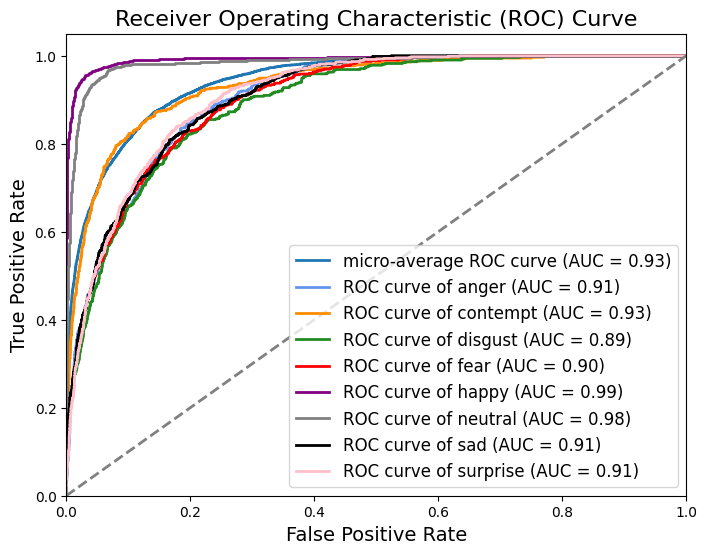

In [ ]:

# calculates the false positive rate, true positive rate, and AUC score

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_2.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(EMOTIONS[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


In [ ]:
# classification report

from sklearn.metrics import classification_report

# y_test argmax
y_test_int = np.argmax(y_test, axis=1)

# prediction
y_pred = model_2.predict(X_test)
# y_pred argmax
y_pred_int = np.argmax(y_pred, axis=1)

'''
#라벨 순서
#'anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise
#감정 5개로(anger,happy,neutral,sad,그외)
for i in range(len(y_pred_int)):
  if y_pred_int[i] in [1,2,3,7]:
    y_pred_int[i]=1
'''


182/182 [==============================] - 1s 5ms/step


"\n#라벨 순서\n#'anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise\n#감정 5개로(anger,happy,neutral,sad,그외)\nfor i in range(len(y_pred_int)):\n  if y_pred_int[i] in [1,2,3,7]:\n    y_pred_int[i]=1\n"

In [ ]:
print(y_pred[0])

[0.00490354 0.00686255 0.01548036 0.00309324 0.03009324 0.9045408
 0.00877343 0.0262529 ]


In [ ]:
print(max(y_pred_int))

7


In [ ]:
model_2.save('/content/drive/MyDrive/affectnetdata/model_2.h5')

In [ ]:
#!pip install mtcnn

In [ ]:
from mtcnn import MTCNN
import cv2

def detect_faces_emo(image_path, detection_confidence=0.99, min_face_size=10):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Create an MTCNN detector instance
    detector = MTCNN()
    faces = detector.detect_faces(image)

    # 얼굴 감지 및 감정 예측
    for face in faces:
        # 감지된 얼굴이 실제 얼굴인
        if face['confidence'] < detection_confidence:
            continue
        # 얼굴 바운딩박스
        x, y, width, height = face['box']
        if min(width, height) < min_face_size:
            continue

        # 얼굴영역
        face_image = image[y:y+height, x:x+width]
        # 96x96으로 resize
        face_image_resized = cv2.resize(face_image, (96, 96))
        # (1, 96, 96, 3)으로 reshape
        face_image_reshaped = face_image_resized.reshape((1, 96, 96, 3))
        # predict
        predicted_emo = model_2.predict(face_image_reshaped)[0]
        # 확률순 정렬
        predicted_emo_sorted = sorted(list(enumerate(predicted_emo)), key=lambda x: x[1], reverse=True)

        # predicted_emo_sorted의 (인덱스,확률값) 반올림
        probabilities = ["{}".format(round(prob * 100)) for index, prob in predicted_emo_sorted]

        #predicted_emo 중 가장 높은값의 인덱스
        #'anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise
        label = EMOTIONS[np.argmax(predicted_emo)]
        #cv2.putText(image, label, (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

        # 얼굴 사각형
        face_size = min(width, height)
        x_center = x + int(width / 2)
        y_center = y + int(height / 2)
        x1 = x_center - int(face_size / 2)
        y1 = y_center - int(face_size / 2)
        x2 = x_center + int(face_size / 2)
        y2 = y_center + int(face_size / 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (127, 255, 0), 2)

        #예측된 확률값들
        for index, prob in predicted_emo_sorted:
          emotion = EMOTIONS[index]
          print(emotion,"{}%".format(round(prob * 100)))

    # Save
    cv2.imwrite("detected_faces.jpg", image)

    # Return the path
    return "detected_faces.jpg"

1/1 [==============================] - 0s 23ms/step
disgust 51%
sad 32%
anger 16%
fear 0%
contempt 0%
neutral 0%
happy 0%
surprise 0%


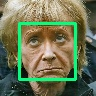

In [ ]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/content/drive/MyDrive/affectnetdata/sad/image0001266.jpg')
# Display the saved image
Image(filename=image_path)